In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from autoencode import Autoencoder
from data_reader import DataReader
from ipywidgets import interact, IntSlider

import keras.callbacks as kc

from sklearn.model_selection import GroupKFold, GroupShuffleSplit

from sklearn.preprocessing import StandardScaler

%matplotlib notebook

In [19]:
print("Loading data...")

devset = pd.read_csv("../data/recsys/movieClipsRatingsTrain_AvgStd.csv", index_col=0)

movie_names = devset.index
groups = devset["movieId"]

audio_features = pd.read_csv("../data/recsys/Audio/i-vector/movieClips_ivec_feats_trte_sitem_gmms_512_tvDim_400_fullId.csv", index_col=0, header=None)
video_features = pd.read_csv("../data/recsys/Visual/AlexNetFc7Final/Avg/AlexNetFeatures - AVG - fc7.csv", index_col=0, header=None)

audio_features = audio_features.loc[movie_names]
video_features = video_features.loc[movie_names]

metadata_genre = pd.read_csv("../data/recsys/Metadata/GenreFeatures.csv", index_col=0)

metadata = metadata_genre.loc[devset.loc[movie_names]["movieId"]]
metadata_features = pd.DataFrame(index=movie_names, data = metadata.values, columns=metadata.columns)    

data = [metadata_features, audio_features, video_features]
data = pd.concat(data, axis=1)

Loading data...


In [20]:
latent_dim = 128    
config = {
    "encoder": [
        {
            "kwargs": {
                "activation": "relu",
                "units": 1024
            },
            "name": "hidden1",
            "type": "Dense"
        },
        {
            "name": "batchnorm1",
            "type": "BatchNormalization"
        },
        {
            "kwargs": {
                "rate": 0
            },
            "name": "dropout",
            "type": "Dropout"
        },
        {
            "kwargs": {
                "activation": "relu",
                "units": 128
            },
            "name": "latent",
            "regularizer": {
                "type": "l1",
                "value": 0
            },
            "type": "Dense"
        }
    ]
}

In [21]:
latent_shape = (latent_dim,)
input_shape = (data.shape[1],)

In [22]:
train_idx, val_idx = next(GroupShuffleSplit().split(data, groups=groups))
data_train, data_val = data.iloc[train_idx], data.iloc[val_idx]

In [23]:
ae = Autoencoder(config["encoder"],
                 None,
                 input_shape=input_shape,
                 latent_shape=latent_shape,
                 loss="mean_absolute_error",
                 optimizer_params=None)

In [24]:
scaler = StandardScaler()
data_train_scaled = scaler.fit_transform(data_train)
data_val_scaled = scaler.transform(data_val)

In [25]:
ae.fit(data_train_scaled, epochs=600, validation_data=data_val_scaled, callbacks = [kc.EarlyStopping(monitor="val_loss", min_delta=0.000001, patience=10)])

Train on 4450 samples, validate on 1112 samples
Epoch 1/600
4450/4450 [==============================] - 21s 5ms/step - loss: 0.5391 - val_loss: 0.4643
Epoch 2/600
4450/4450 [==============================] - 18s 4ms/step - loss: 0.4400 - val_loss: 0.4243
Epoch 3/600
4450/4450 [==============================] - 22s 5ms/step - loss: 0.4084 - val_loss: 0.3886
Epoch 4/600
4450/4450 [==============================] - 23s 5ms/step - loss: 0.3807 - val_loss: 0.3745
Epoch 5/600
4450/4450 [==============================] - 22s 5ms/step - loss: 0.3678 - val_loss: 0.3488
Epoch 6/600
4450/4450 [==============================] - 23s 5ms/step - loss: 0.3541 - val_loss: 0.3464
Epoch 7/600
4450/4450 [==============================] - 23s 5ms/step - loss: 0.3443 - val_loss: 0.3313
Epoch 8/600
4450/4450 [==============================] - 22s 5ms/step - loss: 0.3368 - val_loss: 0.3394
Epoch 9/600
4450/4450 [==============================] - 23s 5ms/step - loss: 0.3325 - val_loss: 0.3182
Epoch 10/600
445

In [39]:
predictions_val = ae.predict(data_val)

In [40]:
scaler.inverse_transform(predictions_val[2])

array([ 1.0961236e-01, -7.5493017e-03,  4.0294635e-04, ...,
        2.4811959e-01, -7.3873267e-02, -2.9913425e+00], dtype=float32)

In [41]:
data

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096
moviename,,,,,,,,,,,,,,,,,,,,,
000000094_2Vam2a4r9vo,0,0,0,0,1,0,0,1,0,0,...,-1.7585,-2.1096,-0.4943,-4.4571,-2.5746,-3.0207,-0.8765,-0.7149,1.9563,-3.9230
000000094_4K8M2EVnoKc,0,0,0,0,1,0,0,1,0,0,...,-2.1871,-1.9004,0.5553,-3.6640,-3.2084,-2.6663,-0.2933,0.0650,1.1357,-3.4170
000000094_DPQ47h-k-nw,0,0,0,0,1,0,0,1,0,0,...,-1.8464,-0.7318,-0.2609,-4.3350,-2.7041,-2.3641,-1.5235,0.4488,-0.1169,-2.7772
000000094_E8LYvflSTAE,0,0,0,0,1,0,0,1,0,0,...,-1.7807,-0.7618,-0.3859,-4.9731,-2.0798,-1.9315,-1.7837,0.8962,0.1652,-3.3158
000000094_F4T2_xFNAqs,0,0,0,0,1,0,0,1,0,0,...,-3.1668,-2.1034,-0.5625,-3.8657,-4.1485,-2.7265,-3.0973,-0.0948,-1.1676,-3.7795
000000094_ITfoGnAkw4I,0,0,0,0,1,0,0,1,0,0,...,-1.7411,-0.7707,-1.0656,-3.5006,-3.0276,-2.5888,-2.0211,-0.2384,-0.5758,-3.7476
000000094_M-h1ERyxbQ0,0,0,0,0,1,0,0,1,0,0,...,-1.3575,-2.6387,0.3418,-4.8561,-4.0521,-1.7706,-1.7021,0.5760,-1.2505,-3.4047
000000094_RqCVbiHCYAA,0,0,0,0,1,0,0,1,0,0,...,-2.8046,-1.5503,0.1592,-4.6191,-3.7799,-1.3093,-1.5902,1.2907,-1.1745,-3.1746
000000094_Uyo69utc9bM,0,0,0,0,1,0,0,1,0,0,...,-1.9062,-1.3591,-0.7767,-3.7881,-4.0221,-2.8336,-2.3937,0.4634,-1.3536,-2.0531


In [42]:
lengths = [d.shape[1] for d in [metadata_features, audio_features, video_features]]
separators = np.cumsum([0] + lengths)
print(lengths)



[18, 400, 4096]


# Visualisation time

<IPython.core.display.Javascript object>


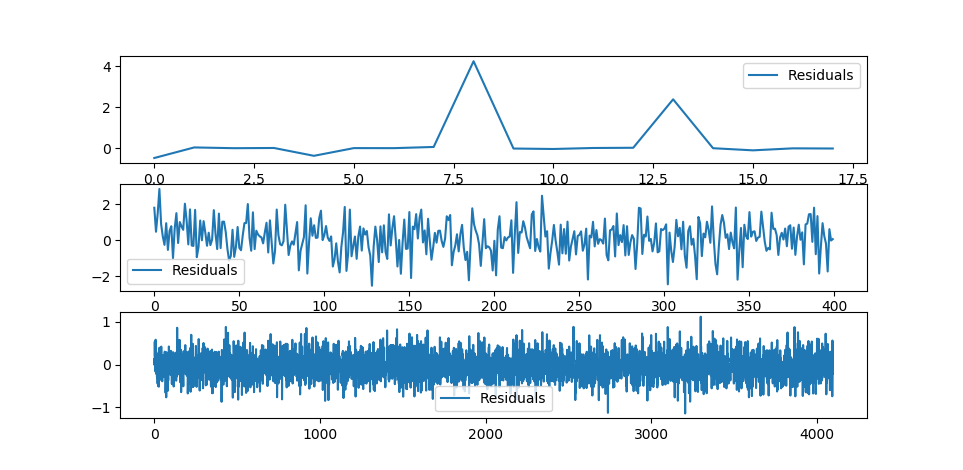

interactive(children=(IntSlider(value=0, description='idx', max=1111), Checkbox(value=False, description='resi…

In [51]:
fig = plt.figure()
subs = [fig.add_subplot(3,1,i+1) for i in range(3)]

def plot_prediction(true_values, predicted_values, subplot, residual):
    if residual:
        subplot.plot(true_values-predicted_values)
        subplot.legend(['Residuals'])
    else:
        subplot.plot(true_values, alpha=0.6)
        subplot.plot(predicted_values, alpha=0.8)
        subplot.legend(['Actual','Predicted'])

@interact(idx=IntSlider(min=0,max=data_val.shape[0]-1), residual=False, scaled=True
def visualise(idx, residual=False, scaled=True):
        
    for i, sub in enumerate(subs):
        sub.clear()
        if not scaled:
            plot_prediction(scaler.inverse_transform(data_val)[idx, separators[i]:separators[i+1]],
                            scaler.inverse_transform(predictions_val)[idx, separators[i]:separators[i+1]],
                            sub, residual)
        else:
            plot_prediction(data_val[idx, separators[i]:separators[i+1]],
                            predictions_val[idx, separators[i]:separators[i+1]],
                            sub, residual)

## Ideas

 * Fixed axes
 * Only one legend
 * Standardise
 * Plot size
 * Line plots or something else?

In [11]:
data_val.shape

(40, 3048)

In [12]:
144+1456+1448

3048

<IPython.core.display.Javascript object>


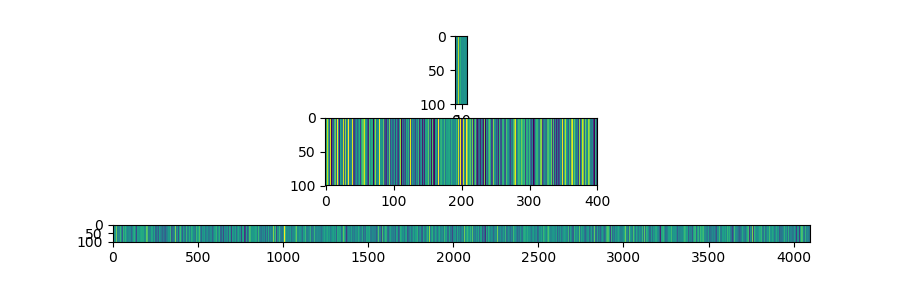

interactive(children=(IntSlider(value=0, description='idx', max=1112), Checkbox(value=False, description='resi…

In [53]:
fig = plt.figure(figsize=(9,3))
subs = [fig.add_subplot(3,1,i+1) for i in range(3)]

def plot_prediction2(true_values, predicted_values, subplot, residual):
    if residual:
        subplot.imshow(np.tile(true_values-predicted_values,(100,1)), 
                       interpolation='none', vmin=-2, vmax=2)
        #subplot.plot(true_values-predicted_values)
        #subplot.legend(['Residuals'])
    else:
        n = len(predicted_values)
        viz = np.zeros([100,n])
        viz[:50] = predicted_values
        viz[50:] = true_values
        subplot.imshow(viz,interpolation='none',cmap='viridis', vmin=-2, vmax=2)
        #subplot.plot(predicted_values, alpha=0.8)
        #subplot.plot(true_values, alpha=0.8)
        #subplot.legend(['Predicted', 'Actual'])

@interact(idx=IntSlider(min=0,max=data_val.shape[0]), residual=False)
def visualise2(idx, residual=False):
    for i, sub in enumerate(subs):
        sub.clear()
        plot_prediction2(data_val[idx, separators[i]:separators[i+1]],
                        predictions_val[idx, separators[i]:separators[i+1]],
                        sub, residual)